Epoch: 0/30000		Training cost = 1.56e+00		Validation cost = 1.71e+00
Epoch: 100/30000		Training cost = 3.70e-01		Validation cost = 4.08e-01
Epoch: 200/30000		Training cost = 2.49e-01		Validation cost = 3.05e-01
Epoch: 300/30000		Training cost = 7.52e-02		Validation cost = 1.47e-01
Epoch: 400/30000		Training cost = 3.74e-02		Validation cost = 8.63e-02
Epoch: 500/30000		Training cost = 1.86e-02		Validation cost = 5.24e-02
Epoch: 600/30000		Training cost = 9.51e-03		Validation cost = 3.06e-02
Epoch: 700/30000		Training cost = 5.66e-03		Validation cost = 1.78e-02
Epoch: 800/30000		Training cost = 4.34e-03		Validation cost = 1.26e-02
Epoch: 900/30000		Training cost = 3.52e-03		Validation cost = 1.17e-02
Epoch: 1000/30000		Training cost = 3.36e-03		Validation cost = 1.10e-02
Epoch: 1100/30000		Training cost = 3.29e-03		Validation cost = 1.10e-02
Epoch: 1200/30000		Training cost = 3.18e-03		Validation cost = 1.10e-02
Epoch: 1300/30000		Training cost = 3.01e-03		Validation cost = 1.09e-02
Epoc

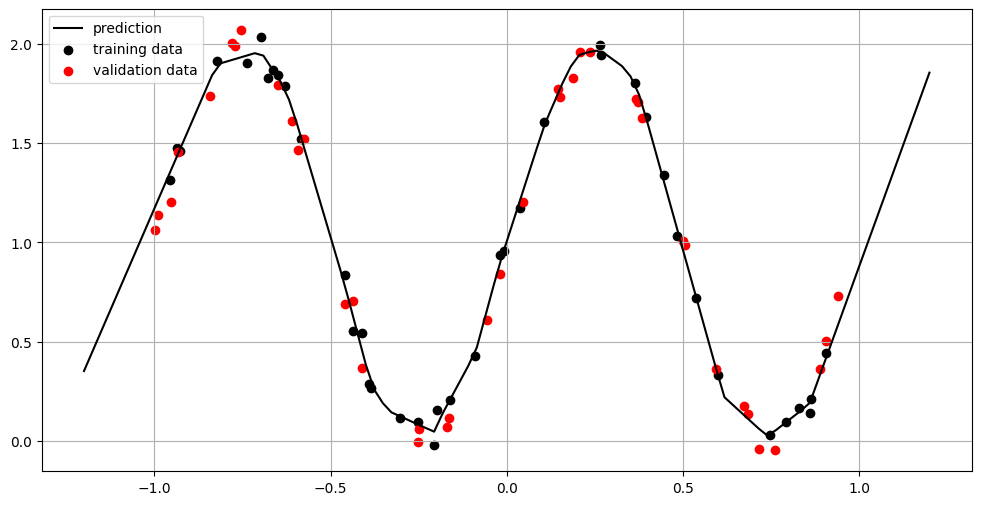

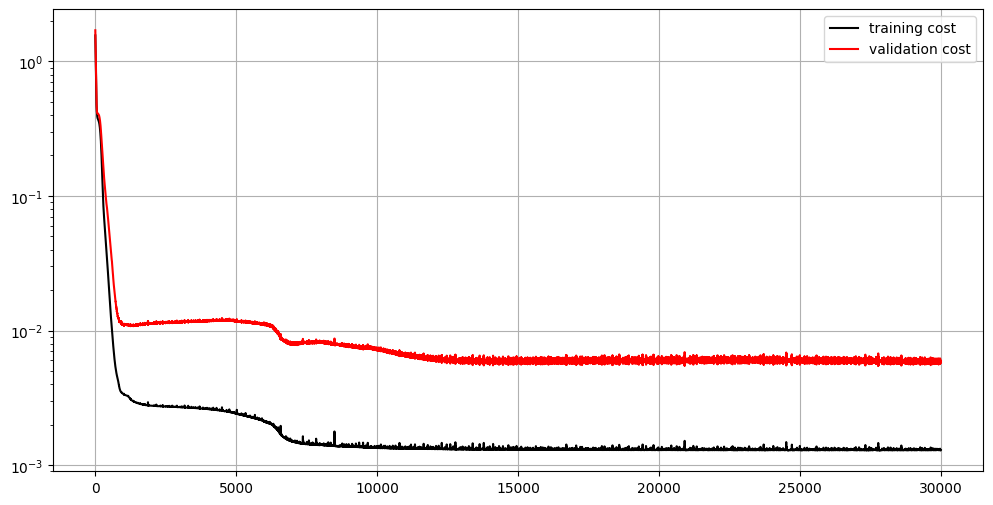

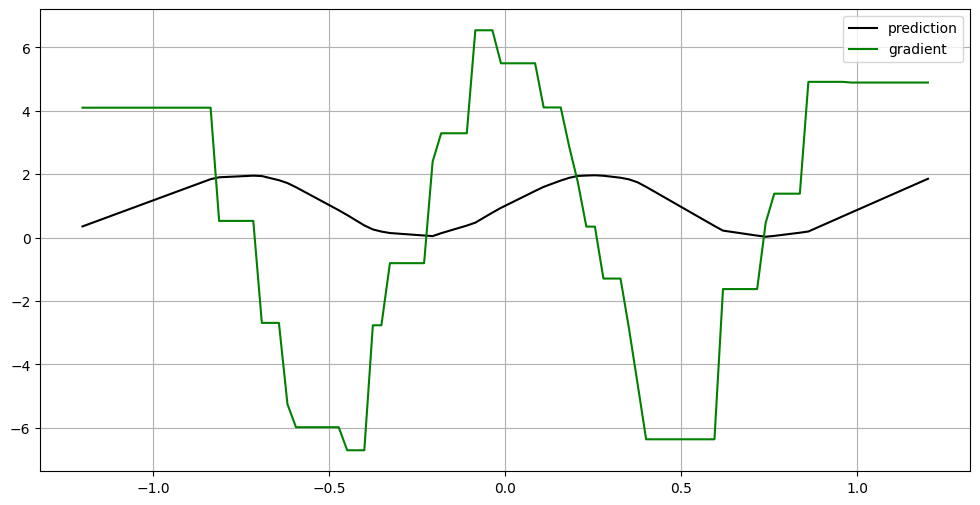

In [4]:
# exercicio 07 - Approximating the Sine function

import torch
import numpy as np
import matplotlib.pyplot as plt

# Data generation

torch.manual_seed(0)
# torch.manual_seed(0) indica que serei eu quem darei as sementes para serem utilizadas

# f = lambda x: torch.sin(2 * torch.pi * x)
f = lambda x: torch.sin(2 * torch.pi * x) +1
# Desta forma os resultados vão variar de 0 a 2
numberOfSamples = 40 # quantidade de exemplos
noise = 0.1 # noise adicionado para treinamento e validação dos dados

xTrain = torch.rand((numberOfSamples, 1)) * 2 - 1
# torch.rand() é o comando para pedir vetor aleatório entre 0 e 1, cujo tamanho será 40x1
yTrain = f(xTrain) + noise * (torch.rand(xTrain.shape) * 2 - 1)
# .shape traz a informação de qual é o tamanho, nestre exemplo mostrará 40 linhas e 1 coluna (40, 1)

xTest = torch.rand((numberOfSamples, 1)) * 2 - 1
yTest = f(xTest) + noise * (torch.rand(xTest.shape) * 2 - 1)

# Model setup

inputDimension = 1
# hiddenDimensions = [20,20]
# [20,20] significa que serão 2 camadas com 20 neurônios.
# hiddenDimensions = [2]
hiddenDimensions = [50,50]

outputDimension = 1

# nonlinearity = torch.nn.Sigmoid()
nonlinearity = torch.nn.ReLU()
# As linhas a cima são as funções de ativações

modules = []
# [] significa uma lista vazia, é uma forma de organizar os dados

modules.append(torch.nn.Linear(inputDimension, hiddenDimensions[0]))
# é o comando para criar uma camada linear (também conhecida como totalmente conectada), o primeiro valor entre parênteses é o numero de entradas e o segundo é a quantidade de neurônios dessa camada)
# o parenteses [0] significa que será o primeiro número da sequencia do hiddenDimensions
# o comando .append significa que estou colocando algo no final, como modules estava vazio, agora tem a primeira camada hidden

modules.append(nonlinearity)
# é o comando para anexar a modules uma camada não linear
for i in range(len(hiddenDimensions) - 1):
    modules.append(torch.nn.Linear(hiddenDimensions[i], hiddenDimensions[i + 1]))
    modules.append(nonlinearity)
# looping para as camadas

modules.append(torch.nn.Linear(hiddenDimensions[-1], outputDimension))
# criação de uma camada linear e o valor [-1] significa que é o ultimo elemento do hiddenDimensions

model = torch.nn.Sequential(*modules)
# torch.nn.Sequential é o comando para conectar toda a N.N
# o *modules, tem significado de desempacotar todas as informações presentes na modules

# hyperparameters & optimizer

# epochs = 10000
epochs = 30000
# Aumentei o número de épocas, afim de forçar a sobreposição.
# lr = 1e-3
# lr = 1e-1
lr = 1e-3
regularization = 1e-4

optimizer = torch.optim.Adam(
    model.parameters(), lr, weight_decay=regularization
)
# weight_decay=regularization é o comando que evita que os pesos cresçam demais,  desta forma incentivando pesos menores

# cost function

def costFunction(yPred, y):
    cost = torch.mean((yPred - y) ** 2)
    return cost

#training loop

costHistoryTrain = np.zeros(epochs)
# np.zeros(algo) cria um array com tamanho igual a sua referência (algo)
costHistoryTest = np.zeros(epochs)
for epoch in range(epochs):
    optimizer.zero_grad()

    yPred = model(xTrain)
    cost = costFunction(yPred, yTrain)

    with torch.no_grad():
        yPredTest = model(xTest)
        costTest = costFunction(yPredTest, yTest)
# with torch.no_grad() significa que não quer fazer operações nem armazenamentos, é uma forma de desligar momentaneamente o cálculo de gradientes.

    costHistoryTrain[epoch] = cost.detach()
# .detach() é o comando para garantir que não afete o back propagation.
    costHistoryTest[epoch] = costTest

    cost.backward()
# Calcula o gradiente em todos os parametros com requires_grad=True
    optimizer.step()
# metodo do otimizador que atualiza o modelo usando os gradientes previamente calculados, "()" é o comando de execução de ativação de alguma função/método
    if epoch % 100 == 0:
# se a época for divisivel por 100 é valida para os comandos abaixo
        string = "Epoch: {}/{}\t\tTraining cost = {:.2e}\t\tValidation cost = {:.2e}"
# string é uma forma dinâmica de plotar textos para o resultado
        print(string.format(epoch, epochs, cost.detach(), costTest))


#visualize the prediction (Parei de revisar os códigos aqui)

x = torch.linspace(-1.2, 1.2, 100).unsqueeze(1)
# .unsqueeze(1) acrescenta uma dimensão, nesse caso serão 100 linhas com uma coluna
yPred = model(x).detach()

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x, yPred, "k", label="prediction")
ax.scatter(xTrain, yTrain, color="k", label="training data")
ax.scatter(xTest, yTest, color="r", label="validation data")
ax.legend()
plt.show()

# visualize the training history


fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(costHistoryTrain, "k", label="training cost")
ax.plot(costHistoryTest, "r", label="validation cost")
ax.legend()
ax.set_yscale("log")
plt.show()

# compute derivative visualization for reference

x = torch.linspace(-1.2, 1.2, 100, requires_grad=True).unsqueeze(1)
yPred = model(x)
gradients = torch.autograd.grad(yPred, x, grad_outputs=torch.ones_like(yPred))[0]

fig, ax = plt.subplots(figsize=(12, 6))
ax.grid()
ax.plot(x.detach().numpy(), yPred.detach().numpy(), "k", label="prediction")
ax.plot(x.detach().numpy(), gradients, 'g', label='gradient')
ax.legend()
plt.show()
